# Online system testing

In [44]:
import numpy as np
from data_slicing.metadata import metadata
from data_slicing.slicing import get_data
from online_system.emd_ica_artifact_removal import get_imfs
from pprint import pprint
import importlib
import mne
from mne.export import export_raw

## Read Data

In [45]:
patient_code = "p10"
patient_metadata = metadata[patient_code]
records = patient_metadata["records"]
record = records[0]
normal_record, seizure_record, info = get_data(record)

Extracting EDF parameters from D:\workspace2\eeg-epilepsy\data\EpilepticEEGDataset\p10_Record1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5401499  =      0.000 ... 10802.998 secs...
=== record_time === 2023-04-01 05:36:39
s_index, s_index_end:  3599500 3822000
=== raw_data.shape ===  (19, 5401500)
=== normal_record.shape ===  (19, 5179000)
=== seizure_record.shape ===  (19, 222500)


## Test EMD Decomposition

In [46]:
start = 0
length = 6000
used_record = normal_record
new_info = mne.create_info(info["ch_names"], ch_types=["eeg"] * len(info["ch_names"]), sfreq=500)
raw = mne.io.RawArray(used_record[:, start:start+length], new_info)

Creating RawArray with float64 data, n_channels=19, n_times=6000
    Range : 0 ... 5999 =      0.000 ...    11.998 secs
Ready.


In [47]:
def get_imfs_it():
    test_data = used_record[:, start:start+length]
    imfs, imf_ch_names = get_imfs(test_data, info["ch_names"])
    a = 1
    return imfs, imf_ch_names

imfs, imf_ch_names = get_imfs_it()

'artifact_removal, channel_number: 19 data_length: 6000'


In [48]:
pprint(imf_ch_names)

['Fp1-Ref imf1',
 'Fp1-Ref imf2',
 'Fp1-Ref imf3',
 'Fp1-Ref imf4',
 'Fp1-Ref imf5',
 'Fp1-Ref imf6',
 'Fp1-Ref imf7',
 'Fp1-Ref imf8',
 'Fp1-Ref imf9',
 'Fp1-Ref imf10',
 'Fp2-Ref imf1',
 'Fp2-Ref imf2',
 'Fp2-Ref imf3',
 'Fp2-Ref imf4',
 'Fp2-Ref imf5',
 'Fp2-Ref imf6',
 'Fp2-Ref imf7',
 'Fp2-Ref imf8',
 'Fp2-Ref imf9',
 'Fp2-Ref imf10',
 'F3-Ref imf1',
 'F3-Ref imf2',
 'F3-Ref imf3',
 'F3-Ref imf4',
 'F3-Ref imf5',
 'F3-Ref imf6',
 'F3-Ref imf7',
 'F3-Ref imf8',
 'F3-Ref imf9',
 'F4-Ref imf1',
 'F4-Ref imf2',
 'F4-Ref imf3',
 'F4-Ref imf4',
 'F4-Ref imf5',
 'F4-Ref imf6',
 'F4-Ref imf7',
 'F4-Ref imf8',
 'F4-Ref imf9',
 'F4-Ref imf10',
 'C3-Ref imf1',
 'C3-Ref imf2',
 'C3-Ref imf3',
 'C3-Ref imf4',
 'C3-Ref imf5',
 'C3-Ref imf6',
 'C3-Ref imf7',
 'C3-Ref imf8',
 'C3-Ref imf9',
 'C3-Ref imf10',
 'C4-Ref imf1',
 'C4-Ref imf2',
 'C4-Ref imf3',
 'C4-Ref imf4',
 'C4-Ref imf5',
 'C4-Ref imf6',
 'C4-Ref imf7',
 'C4-Ref imf8',
 'C4-Ref imf9',
 'C4-Ref imf10',
 'P3-Ref imf1',
 'P3-Ref imf2',

In [49]:
from online_system import emd_ica_artifact_removal
importlib.reload(emd_ica_artifact_removal)

def imf_filtering_it():
    return emd_ica_artifact_removal.imf_filtering(imfs, imf_ch_names)

eligible_imf_indexes = imf_filtering_it()
pprint(eligible_imf_indexes)

          ch_name   entropy       kurt
0    A2-Ref imf10  1.598418   1.709443
1     A2-Ref imf9  2.352283  -0.526160
2     A2-Ref imf8  2.395919  -0.148522
3     A2-Ref imf7  2.255710   1.720547
4     A2-Ref imf6  2.232710   0.485621
..            ...       ...        ...
181  Fp1-Ref imf5  2.290112   0.138090
182  Fp1-Ref imf4  1.733793   3.127273
183  Fp1-Ref imf3  1.041158  10.292114
184  Fp1-Ref imf2  0.625274  52.022683
185  Fp1-Ref imf1  0.260589  84.193908

[186 rows x 3 columns]
Int64Index([  0,   1,   2,   3,   4,   5,   6,  10,  12,  13,
            ...
            169, 170, 171, 176, 177, 178, 179, 180, 181, 182],
           dtype='int64', length=122)


In [50]:
eligible_imfs = imfs[eligible_imf_indexes]
eligible_imf_ch_names = np.array(imf_ch_names)[eligible_imf_indexes]
print(eligible_imfs.shape)
print(eligible_imf_ch_names)

(122, 6000)
['Fp1-Ref imf1' 'Fp1-Ref imf2' 'Fp1-Ref imf3' 'Fp1-Ref imf4'
 'Fp1-Ref imf5' 'Fp1-Ref imf6' 'Fp1-Ref imf7' 'Fp2-Ref imf1'
 'Fp2-Ref imf3' 'Fp2-Ref imf4' 'Fp2-Ref imf5' 'Fp2-Ref imf6'
 'Fp2-Ref imf7' 'F3-Ref imf1' 'F3-Ref imf2' 'F3-Ref imf3' 'F3-Ref imf4'
 'F3-Ref imf5' 'F3-Ref imf6' 'F4-Ref imf1' 'F4-Ref imf2' 'F4-Ref imf3'
 'F4-Ref imf4' 'F4-Ref imf5' 'F4-Ref imf6' 'F4-Ref imf7' 'C3-Ref imf2'
 'C3-Ref imf3' 'C3-Ref imf4' 'C3-Ref imf5' 'C3-Ref imf6' 'C3-Ref imf10'
 'C4-Ref imf1' 'C4-Ref imf2' 'C4-Ref imf3' 'C4-Ref imf4' 'C4-Ref imf5'
 'C4-Ref imf6' 'C4-Ref imf10' 'P3-Ref imf1' 'P3-Ref imf2' 'P3-Ref imf3'
 'P3-Ref imf4' 'P3-Ref imf5' 'P3-Ref imf9' 'P3-Ref imf10' 'P4-Ref imf1'
 'P4-Ref imf2' 'P4-Ref imf3' 'P4-Ref imf4' 'P4-Ref imf9' 'P4-Ref imf10'
 'O1-Ref imf1' 'O1-Ref imf2' 'O1-Ref imf3' 'O1-Ref imf4' 'O1-Ref imf9'
 'O1-Ref imf10' 'O2-Ref imf1' 'O2-Ref imf2' 'O2-Ref imf3' 'O2-Ref imf4'
 'O2-Ref imf5' 'O2-Ref imf9' 'O2-Ref imf10' 'F7-Ref imf1' 'F7-Ref imf2'
 'F7-Ref imf3' 'F

In [51]:
from online_system import emd_ica_artifact_removal
importlib.reload(emd_ica_artifact_removal)
imfs_raw = emd_ica_artifact_removal.ica_stage(eligible_imfs,eligible_imf_ch_names)

Creating RawArray with float64 data, n_channels=122, n_times=6000
    Range : 0 ... 5999 =      0.000 ...    11.998 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)

Fitting ICA to data using 122 channels (please be patient, this may take a while)
Selecting by number: 30 components


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 122 out of 122 | elapsed:    0.0s finished


Fitting ICA took 1.0s.
Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 16 ICA components
    Projecting back using 122 PCA components


In [52]:
import online_system.emd_ica_artifact_removal
importlib.reload(emd_ica_artifact_removal)
raw_without_artifacts = emd_ica_artifact_removal.imfs_merge(imfs_raw)

Creating RawArray with float64 data, n_channels=19, n_times=6000
    Range : 0 ... 5999 =      0.000 ...    11.998 secs
Ready.
(19, 6000)


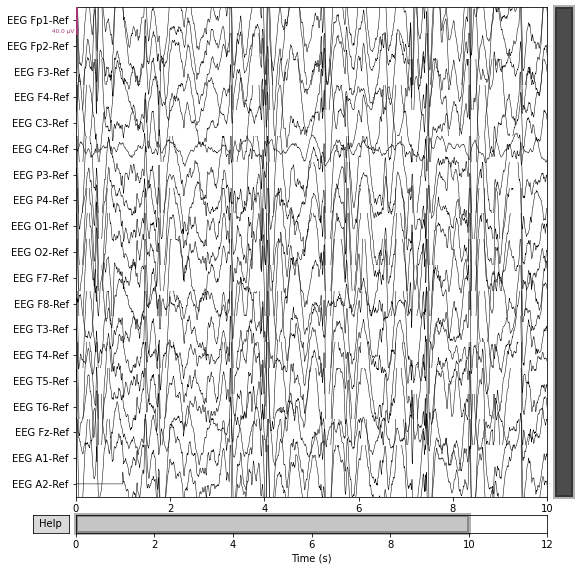

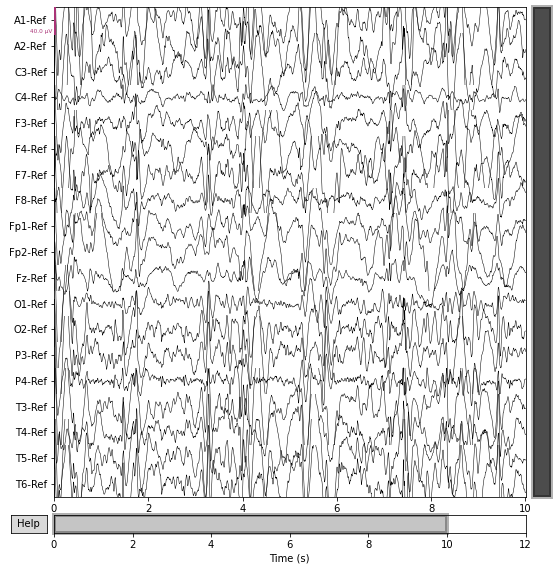

In [53]:
from datetime import datetime
import os
output_folder = os.path.join(os.path.abspath(''), "output-" + datetime.now().strftime("%m-%d-%Y_%H-%M-%S"))
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
raw.plot()
export_raw(os.path.join(output_folder, "raw.edf"), raw, fmt='edf', add_ch_type=True, overwrite=True)
raw_without_artifacts.plot()
export_raw(os.path.join(output_folder,"raw_without_artifacts.edf"), raw_without_artifacts, fmt='edf', add_ch_type=True, overwrite=True)